In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df_2018 = pd.read_excel("nba_2018_19.xlsx")
df_2019 = pd.read_excel("nba_2019_20.xlsx")
df_2020 = pd.read_excel("nba_2020_21.xlsx")
df_2021 = pd.read_excel("nba_2021_22.xlsx")
df_2022 = pd.read_excel('nba_2022_23.xlsx')

df_2022['AST/TOV'] = df_2022['AST'] / df_2022['TOV']
df_2021['AST/TOV'] = df_2021['AST'] / df_2021['TOV']
df_2020['AST/TOV'] = df_2020['AST'] / df_2020['TOV']
df_2019['AST/TOV'] = df_2019['AST'] / df_2019['TOV']
df_2018['AST/TOV'] = df_2018['AST'] / df_2018['TOV']

df_2022['Corner 3-pt Per Game'] = df_2022['3PA'] * df_2022['CORNER FREQ'] * df_2022['CORNER RATE']
df_2021['Corner 3-pt Per Game'] = df_2021['3PA'] * df_2021['CORNER FREQ'] * df_2021['CORNER RATE']
df_2020['Corner 3-pt Per Game'] = df_2020['3PA'] * df_2020['CORNER FREQ'] * df_2020['CORNER RATE']
df_2019['Corner 3-pt Per Game'] = df_2019['3PA'] * df_2019['CORNER FREQ'] * df_2019['CORNER RATE']
df_2018['Corner 3-pt Per Game'] = df_2018['3PA'] * df_2018['CORNER FREQ'] * df_2018['CORNER RATE']

In [5]:
df_2019

,Team,3PA,3P RATE,AST,TOV,W,ORTG,DRTG,NRTG,DEF EFG,CORNER FREQ,CORNER RATE,PLAYOFFS,AST/TOV,Corner 3-pt Per Game
0,Atlanta Hawks,36.1,0.333,24.0,16.2,20,107.2,114.8,-7.6,0.543,0.201,0.342,Missed Playoffs,1.481481,2.481586
1,Boston Celtics*,34.5,0.364,23.0,13.8,48,113.3,107.0,6.3,0.509,0.181,0.396,Made Final Four,1.666667,2.472822
2,Brooklyn Nets*,38.1,0.343,24.5,15.3,35,108.9,109.5,-0.6,0.511,0.213,0.369,Made Playoffs,1.601307,2.994546
3,Charlotte Hornets,34.3,0.352,23.8,14.6,23,106.3,113.3,-7.0,0.546,0.201,0.397,Missed Playoffs,1.630137,2.737037
4,Chicago Bulls,35.1,0.348,23.2,15.5,22,106.7,109.8,-3.1,0.546,0.225,0.383,Missed Playoffs,1.496774,3.024743
5,Cleveland Cavaliers,31.8,0.351,23.1,16.5,19,107.5,115.4,-7.9,0.560,0.188,0.396,Missed Playoffs,1.400000,2.367446
6,Dallas Mavericks*,41.3,0.367,24.7,12.7,43,116.7,111.7,5.0,0.525,0.204,0.408,Made Playoffs,1.944882,3.437482
7,Denver Nuggets*,30.6,0.359,26.7,13.8,46,113.1,111.0,2.1,0.533,0.208,0.401,Made Final Four,1.934783,2.552285
8,Detroit Pistons,32.7,0.367,24.1,15.3,20,109.0,112.7,-3.7,0.541,0.284,0.422,Missed Playoffs,1.575163,3.919030
9,Golden State Warriors,31.3,0.334,25.6,14.9,15,105.2,113.8,-8.6,0.553,0.182,0.405,Missed Playoffs,1.718121,2.307123


In [33]:
# Use this color dictionary for all graphs to differentiate based on each team's playoff status

colors = {'Missed Playoffs' : 'brown', 'Made Playoffs' : 'blue', 'Made Final Four' : 'green', 'Won Finals' : 'red'}

In [34]:
# Function to make scatterplot and generate regression line and r^2 value given dataframe and statistic column

def test_statistic(df, stat, figsize = (8, 5), y = "W", playoffs = "PLAYOFFS", s = 50, 
                   title = 'Default', xlabel = 'Default', ylabel = 'Default'):
    
    if title == 'Default':
        title = f'{stat} effect on Wins'
    if xlabel == 'Default':
        xlabel = stat
    if ylabel == 'Default':
        ylabel = 'Wins'
    
    plt.figure(figsize = figsize)
    scatter = sns.scatterplot(x = stat, y = y, data = df, hue = playoffs, palette = colors, s = s)
    scatter.set(title = title, xlabel = xlabel, ylabel = ylabel)
    
    x = df[stat].values.reshape(-1, 1)
    y = df[y].values
    model = LinearRegression().fit(x, y)
    plt.plot(x, model.predict(x), color = 'black', alpha = 0.6)
    r_2 = r2_score(y, model.predict(x))
    
    plt.show()
    
    print(f'R-squared: {r_2}')

Our model will consist of the following weights:
* 70%: Net rating (ORTG - DRTG)
* 13%: Defensive EFG%
* 11%: 3-point FG%
* 4%: AST/TO Rate
* 2%: Corner 3-point Per Game


**Part 1: EDA on 2021-22 season**

In [35]:
model_parameters = pd.DataFrame(columns = ["Team", "Wins", 'Playoffs', "Net Rating", 
                                           "Defensive EFG%", '3-pt FG%', 
                                           'AST/TO Rate', 'Corner 3-pt Per Game'])
model_parameters['Team'] = df_2021['TEAM']
model_parameters['Wins'] = df_2021['W']
model_parameters['Playoffs'] = df_2021['PLAYOFFS']

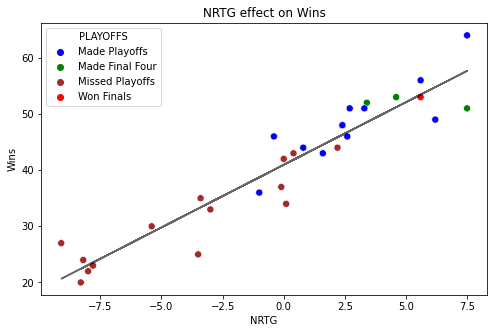

R-squared: 0.8946227362831126


In [36]:
# Net Rating

df_2021['NRTG'] = df_2021['ORTG'] - df_2021['DRTG']

test_statistic(df_2021, 'NRTG')

In [37]:
# Turn into percentiles

model_parameters["Net Rating"] = np.round(((df_2021['NRTG'] + 12.5) / 25) * 70, 2)

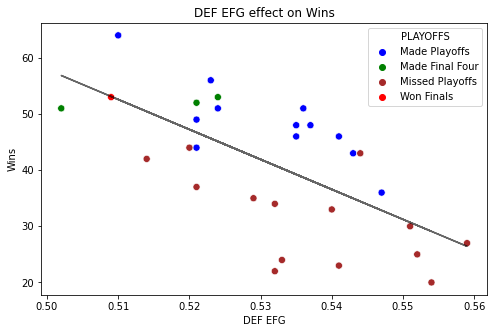

R-squared: 0.42811115977657477


In [38]:
# Defensive EFG%

test_statistic(df_2021, 'DEF EFG')

In [39]:
model_parameters["Defensive EFG%"] = np.round(((1 - (df_2021['DEF EFG'] - 0.50) / 0.06) * 13), 2)

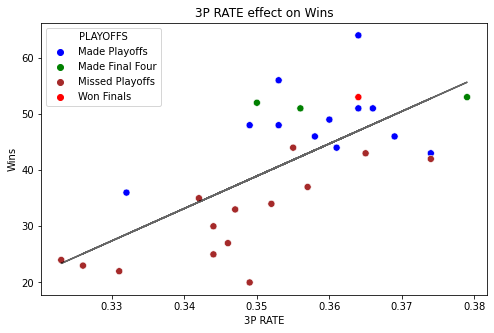

R-squared: 0.48007715010468777


In [40]:
# 3-pt FG

test_statistic(df_2021, '3P RATE')

In [41]:
model_parameters['3-pt FG%'] = np.round(((df_2021['3P RATE'] - 0.31) / 0.07), 2) * 11

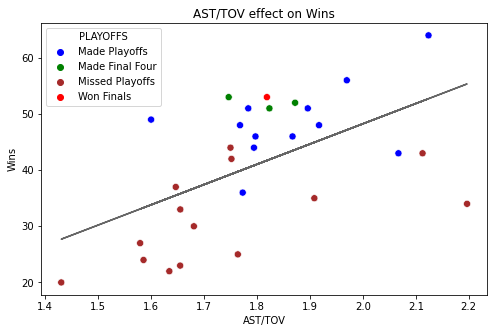

R-squared: 0.30012218167053795


In [42]:
# AST/TO Rate
df_2021['AST/TOV'] = df_2021['AST'] / df_2021['TOV']

test_statistic(df_2021, 'AST/TOV')

In [43]:
model_parameters['AST/TO Rate'] = np.round(((df_2021['AST/TOV'] - 1.5) / 0.6), 2) * 4

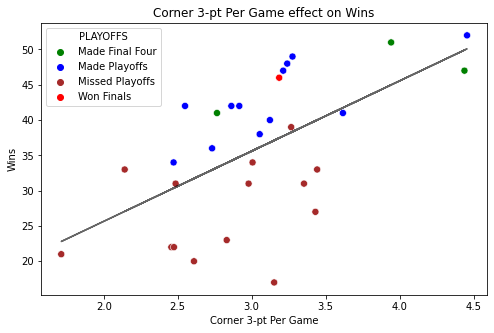

R-squared: 0.35018765881148994


In [44]:
# Corner 3-pt Per Game

test_statistic(df_2020, 'Corner 3-pt Per Game')

In [45]:
model_parameters['Corner 3-pt Per Game'] = np.round(((df_2021['Corner 3-pt Per Game'] - 2.5) / 1.5), 2) * 2

In [46]:
model_parameters['Score'] = model_parameters[['Net Rating', 'Defensive EFG%', 
                                              '3-pt FG%', 'AST/TO Rate', 
                                              'Corner 3-pt Per Game']].sum(axis = 1) * 0.82

In [73]:
model_parameters['Difference'] = model_parameters['Score'] - model_parameters['Wins']
model_parameters.sort_values(by = "Difference")
real = model_parameters.copy()['Wins'].rank(method = 'min', ascending = False)
modeled = model_parameters.copy()['Score'].rank(method = 'min', ascending = False)
model_parameters['Rank'] = real.astype(int)
model_parameters['Modeled Rank'] = modeled.astype(int)
new = model_parameters[['Team', 'Wins', 'Rank', 'Score', 'Modeled Rank', 'Difference']]
new.sort_values('Rank')

,Team,Wins,Rank,Score,Modeled Rank,Difference
23,Phoenix Suns,64,1,65.9608,1,1.9608
14,Memphis Grizzlies,56,2,56.5062,6,0.5062
9,Golden State Warriors,53,3,59.7124,3,6.7124
15,Miami Heat,53,3,58.0478,5,5.0478
6,Dallas Mavericks,52,5,52.1356,7,0.1356
1,Boston Celtics,51,6,64.8702,2,13.8702
22,Philadelphia 76ers,51,6,51.0122,8,0.0122
16,Milwaukee Bucks,51,6,50.5448,9,-0.4552
28,Utah Jazz,49,9,58.1708,4,9.1708
27,Toronto Raptors,48,10,46.0348,16,-1.9652


In [55]:
df1 = model_parameters[['Team', 'Wins', 'Playoffs']].sort_values(by = 'Wins', ascending = False).reset_index(drop = True)
df2 = model_parameters[['Team', 'Score', 'Playoffs']].sort_values(by = 'Score', ascending = False).reset_index(drop = True)

results = pd.concat([df1, df2], axis = 1)
results[['Team', 'Score', 'Playoffs']]

,Team,Team,Score,Playoffs,Playoffs
0,Phoenix Suns,Phoenix Suns,65.9608,Made Playoffs,Made Playoffs
1,Memphis Grizzlies,Boston Celtics,64.8702,Made Playoffs,Made Final Four
2,Miami Heat,Golden State Warriors,59.7124,Made Final Four,Won Finals
3,Golden State Warriors,Utah Jazz,58.1708,Won Finals,Made Playoffs
4,Dallas Mavericks,Miami Heat,58.0478,Made Final Four,Made Final Four
5,Boston Celtics,Memphis Grizzlies,56.5062,Made Final Four,Made Playoffs
6,Philadelphia 76ers,Dallas Mavericks,52.1356,Made Playoffs,Made Final Four
7,Milwaukee Bucks,Philadelphia 76ers,51.0122,Made Playoffs,Made Playoffs
8,Utah Jazz,Milwaukee Bucks,50.5448,Made Playoffs,Made Playoffs
9,Denver Nuggets,Minnesota Timberwolves,48.1914,Made Playoffs,Made Playoffs


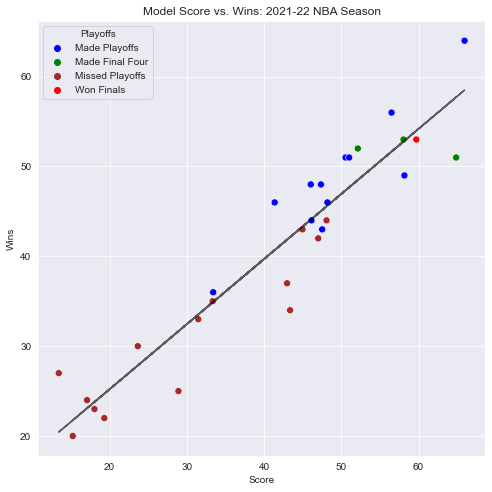

R-squared: 0.894503871749798


In [48]:
sns.set_style('darkgrid')
test_statistic(df = model_parameters, stat = 'Score', y = "Wins", playoffs = "Playoffs", figsize = (8, 8),
              title = "Model Score vs. Wins: 2021-22 NBA Season")

In [83]:
def score_model(df, year, games = 82):
    model_parameters = pd.DataFrame(columns = ["Team", "Wins", 'Playoffs', "Net Rating", 
                                               "Defensive EFG%", '3-pt FG%', 
                                               'AST/TO Rate', 'Corner 3-pt Per Game'])
    model_parameters['Team'] = df['Team']
    model_parameters['Wins'] = df['W']
    model_parameters['Playoffs'] = df['PLAYOFFS']
    
    model_parameters["Net Rating"] = np.round(((df['NRTG'] + 12.5) / 25) * 70, 2)
    model_parameters["Defensive EFG%"] = np.round(((1 - (df['DEF EFG'] - 0.50) / 0.06) * 13), 2)
    model_parameters['3-pt FG%'] = np.round(((df['3P RATE'] - 0.31) / 0.07), 2) * 11
    model_parameters['AST/TO Rate'] = np.round(((df['AST/TOV'] - 1.5) / 0.6), 2) * 4
    model_parameters['Corner 3-pt Per Game'] = np.round(((df['Corner 3-pt Per Game'] - 2.5) / 1.5), 2) * 2\
    
    model_parameters['Score'] = model_parameters[['Net Rating', 'Defensive EFG%', 
                                                  '3-pt FG%', 'AST/TO Rate', 
                                                  'Corner 3-pt Per Game']].sum(axis = 1) * games / 100
    model_parameters['Difference'] = model_parameters['Score'] - model_parameters['Wins']
    model_parameters.sort_values(by = "Difference")
    real = model_parameters.copy()['Wins'].rank(method = 'min', ascending = False)
    modeled = model_parameters.copy()['Score'].rank(method = 'min', ascending = False)
    model_parameters['Rank'] = real.astype(int)
    model_parameters['Modeled Rank'] = modeled.astype(int)
    new = model_parameters[['Team', 'Wins', 'Rank', 'Score', 'Modeled Rank', 'Difference']]
    
    results = pd.concat([df1, df2], axis = 1)
    sns.set_style('darkgrid')
    test_statistic(df = model_parameters, stat = 'Score', y = "Wins", playoffs = "Playoffs", figsize = (8, 8),
              title = f"Model Score vs. Wins: {year} NBA Season")
    return new.sort_values('Rank')


In [50]:
def score_model_incomplete_data(df, year, games = 82):
    model_parameters = pd.DataFrame(columns = ["Team", "Net Rating", 
                                               "Defensive EFG%", '3-pt FG%', 
                                               'AST/TO Rate', 'Corner 3-pt Per Game'])
    model_parameters['Team'] = df['Team']
    
    model_parameters["Net Rating"] = np.round(((df['NRTG'] + 12.5) / 25) * 70, 2)
    model_parameters["Defensive EFG%"] = np.round(((1 - (df['DEF EFG'] - 0.50) / 0.06) * 13), 2)
    model_parameters['3-pt FG%'] = np.round(((df['3P RATE'] - 0.31) / 0.07), 2) * 11
    model_parameters['AST/TO Rate'] = np.round(((df['AST/TOV'] - 1.5) / 0.6), 2) * 4
    model_parameters['Corner 3-pt Per Game'] = np.round(((df['Corner 3-pt Per Game'] - 2.5) / 1.5), 2) * 2\
    
    model_parameters['Score'] = model_parameters[['Net Rating', 'Defensive EFG%', 
                                                  '3-pt FG%', 'AST/TO Rate', 
                                                  'Corner 3-pt Per Game']].sum(axis = 1) * games / 100
    
    return model_parameters[['Team', 'Score']].sort_values(by = 'Score', ascending = False)

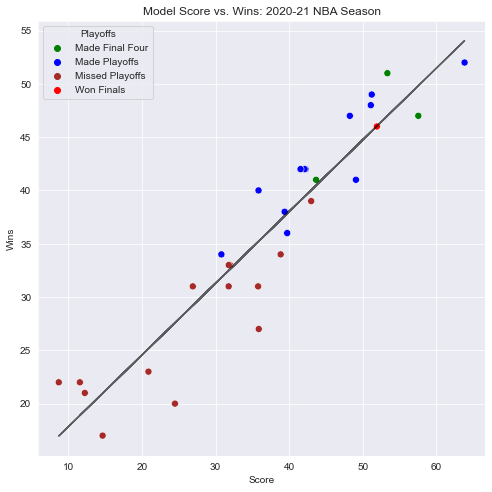

R-squared: 0.8833750678771104


,Team,Wins,Rank,Score,Modeled Rank,Difference
28,Utah Jazz*,52,1,63.8424,1,11.8424
23,Phoenix Suns*,51,2,53.3520,3,2.3520
22,Philadelphia 76ers*,49,3,51.2208,5,2.2208
2,Brooklyn Nets*,48,4,51.0984,6,3.0984
7,Denver Nuggets*,47,5,48.2472,8,1.2472
12,Los Angeles Clippers*,47,5,57.5568,2,10.5568
16,Milwaukee Bucks*,46,7,51.9192,4,5.9192
24,Portland Trail Blazers*,42,8,41.5440,13,-0.4560
6,Dallas Mavericks*,42,8,42.2280,11,0.2280
13,Los Angeles Lakers*,42,8,42.0912,12,0.0912


In [84]:
score_model(df_2020, '2020-21', games = 72)

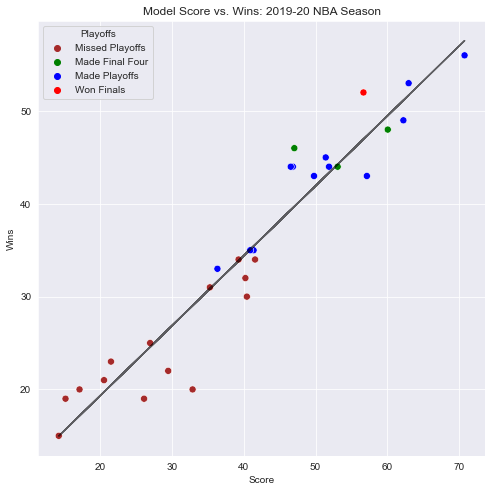

R-squared: 0.9200875384236136


,Wins,Team,Team,Score
0,56,Milwaukee Bucks*,Milwaukee Bucks*,70.7496
1,53,Toronto Raptors*,Toronto Raptors*,62.9596
2,52,Los Angeles Lakers*,Los Angeles Clippers*,62.2298
3,49,Los Angeles Clippers*,Boston Celtics*,60.0568
4,48,Boston Celtics*,Dallas Mavericks*,57.1458
5,46,Denver Nuggets*,Los Angeles Lakers*,56.6702
6,45,Indiana Pacers*,Miami Heat*,53.0786
7,44,Miami Heat*,Utah Jazz*,51.8732
8,44,Houston Rockets*,Indiana Pacers*,51.4140
9,44,Utah Jazz*,Philadelphia 76ers*,49.7822


In [89]:
score_model(df_2019, '2019-20')

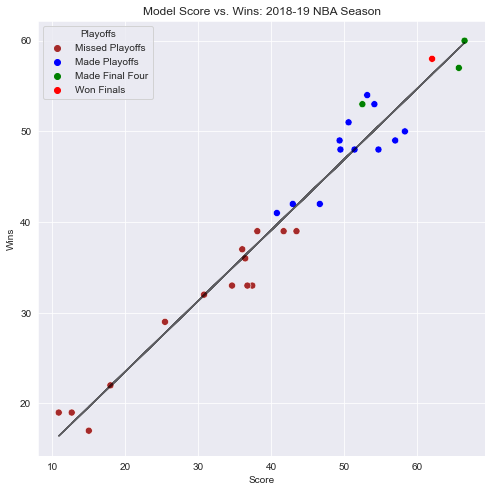

R-squared: 0.9580910796022633


,Wins,Team,Team,Score
0,60,Milwaukee Bucks*,Milwaukee Bucks*,66.5184
1,58,Toronto Raptors*,Golden State Warriors*,65.7312
2,57,Golden State Warriors*,Toronto Raptors*,62.0658
3,54,Denver Nuggets*,Utah Jazz*,58.3348
4,53,Houston Rockets*,Boston Celtics*,57.0064
5,53,Portland Trail Blazers*,Indiana Pacers*,54.7104
6,51,Philadelphia 76ers*,Houston Rockets*,54.1528
7,50,Utah Jazz*,Denver Nuggets*,53.1688
8,49,Oklahoma City Thunder*,Portland Trail Blazers*,52.5046
9,49,Boston Celtics*,San Antonio Spurs*,51.4304


In [90]:
score_model(df_2018, '2018-19')

In [85]:
score_model_incomplete_data(df_2022, '2022-23 season')

,Team,Score
1,Boston Celtics,65.9034
23,Phoenix Suns,64.3126
5,Cleveland Cavaliers,60.7374
18,New Orleans Pelicans,55.9568
16,Milwaukee Bucks,54.2922
22,Philadelphia 76ers,53.5050
2,Brooklyn Nets,48.2652
28,Utah Jazz,46.3710
9,Golden State Warriors,45.4608
11,Indiana Pacers,44.3866
